In [7]:
from utils.SST_utils import get_cmip_data, get_historical_ssts

cmip_data = get_cmip_data()
cmip_data

<xarray.Dataset>
Dimensions:        (time: 1032, latitude: 192, longitude: 288)
Coordinates:
  * time           (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T1...
  * latitude       (latitude) float64 -89.53 -88.59 -87.66 ... 87.66 88.59 89.53
  * longitude      (longitude) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
Data variables:
    tos_mean_mean  (time, latitude, longitude) float32 ...
    tos_mean_std   (time, latitude, longitude) float32 ...
    tos_mean_min   (time, latitude, longitude) float32 ...
    tos_mean_max   (time, latitude, longitude) float32 ...
Attributes:
    experiment:            gap-filling scenario reaching 7.0 based on SSP3
    variable_id:           tos
    table_id:              Omon
    frequency:             mon
    activity_id:           ScenarioMIP AerChemMIP
    experiment_id:         ssp370
    source_id:             ['FGOALS-f3-L', 'NorESM2-LM', 'MRI-ESM2-0', 'EC-Ea...
    scenario_variables:    ['tas_mean', 'tos_mean', 'sos_mean', 'siconc_mean']
    scenario_experiments:  ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp5...

## historical run??

In [8]:
historical_ssts = get_historical_ssts()

In [9]:
future_tropical_mean = cmip_data['tos_mean_mean'].sel(latitude=slice(-10,10)).mean(dim=['latitude', 'longitude']).rolling(time=12).mean(dim='time').dropna(dim='time')
historical_tropical_mean = historical_ssts['sst'].sel(lat=slice(-10,10)).mean().values

future_tropical_mean_anomaly = future_tropical_mean - historical_tropical_mean
tropical_anomaly_df = future_tropical_mean_anomaly.to_dataframe().reset_index()



/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_53752/3686677818.py:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  future_tropical_mean = cmip_data['tos_mean_mean'].sel(latitude=slice(-10,10)).mean(dim=['latitude', 'longitude']).rolling(time=12).mean(dim='time').dropna(dim='time')


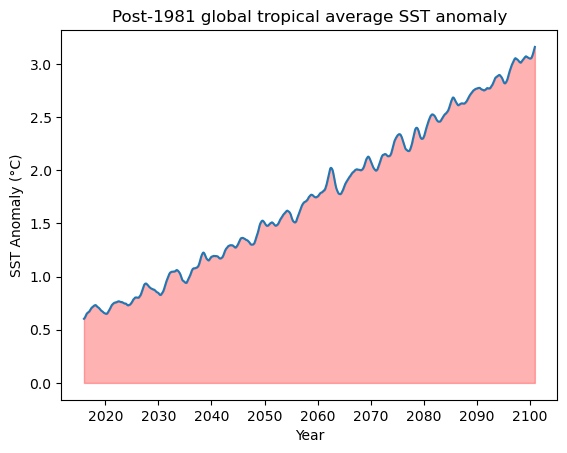

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_anomaly(df, x_name, y_name, title, x_label, y_label):
    ax = sns.lineplot(data = df,y=y_name, x=x_name)
    line_obj = ax.lines[0]
    x1 = line_obj.get_xydata()[:,0]
    y1 = line_obj.get_xydata()[:,1]

    x1_pos = x1[y1 > 0]
    y1_pos = y1[y1 > 0]

    x1_neg = x1[y1 < 0]
    y1_neg = y1[y1 < 0]

    ax.fill_between(x1_pos,y1_pos, color="red", alpha=0.3)
    ax.fill_between(x1_neg,y1_neg, color="blue", alpha=0.3)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()
    fig = ax.get_figure()
    fig.savefig('./media/SST/anomaly/tropical_sst_anomaly.png')

plot_anomaly(
    tropical_anomaly_df, 
    y_name='tos_mean_mean', 
    x_name='time', 
    title='Post-1981 global tropical average SST anomaly', 
    x_label='Year', 
    y_label='SST Anomaly (°C)')

In [ ]:
## locales of future warming.....